<a href="https://colab.research.google.com/github/Vedant-cloud-ctrl/Quantium/blob/main/Quantium_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
upload = files.upload()

Saving QVI_transaction_data(1).csv to QVI_transaction_data(1).csv
Saving QVI_purchase_behaviour.csv to QVI_purchase_behaviour.csv


In [3]:
import pandas as pd
import numpy as np
import io

In [4]:
df_1 = pd.read_csv(io.BytesIO(upload["QVI_transaction_data(1).csv"]))
df_2 = pd.read_csv(io.BytesIO(upload["QVI_purchase_behaviour.csv"]))

In [5]:
df_1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
df_2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [7]:
df_1.dtypes

,0
DATE,int64
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64


The DATE column type is integer we'll convert into datetime format before proceeding further.

In [8]:
# Convert DATE column in datetime format
df_1["DATE"] = pd.to_datetime(df_1["DATE"], origin="1899-12-30", unit="D")

We need check if the data contains right products.

In [9]:
df_1["PROD_NAME"]

,PROD_NAME
0,Natural Chip Compny SeaSalt175g
1,CCs Nacho Cheese 175g
2,Smiths Crinkle Cut Chips Chicken 170g
3,Smiths Chip Thinly S/Cream&Onion 175g
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g
...,...
264831,Kettle Sweet Chilli And Sour Cream 175g
264832,Tostitos Splash Of Lime 175g
264833,Doritos Mexicana 170g
264834,Doritos Corn Chip Mexican Jalapeno 150g


**Text Analysis**

The product contains all potato chips lets analyze it further to check if  the data has more than a chips by using basic text analysis

In [10]:
# Tokenize given words for product name
product_words = df_1["PROD_NAME"].str.split().explode().str.lower()
print("Tokenized words of poduct name:")
product_words

Tokenized words of poduct name:


,PROD_NAME
0,natural
0,chip
0,compny
0,seasalt175g
1,ccs
...,...
264835,tostitos
264835,splash
264835,of
264835,lime


In [11]:
from collections import Counter
# Count word frequencies
word_feq = Counter(product_words)
common_words = word_feq.most_common(30)
print("Common words in product name:")
for word, freq in common_words:
  print(f"{word}: {freq}")

Common words in product name:
175g: 60561
chips: 49770
150g: 43131
kettle: 41288
&: 35565
smiths: 28860
salt: 27976
cheese: 27890
pringles: 25102
134g: 25102
doritos: 24962
crinkle: 23960
110g: 22387
corn: 22063
original: 21560
cut: 20754
chip: 18645
170g: 18502
salsa: 18094
chicken: 15407
165g: 15297
sea: 14145
thins: 14075
sour: 13882
crisps: 12607
330g: 12540
vinegar: 12402
chilli: 12389
300g: 12041
rrd: 11894


In [12]:
# Remove words with symbols and columns
cleaned_words = product_words[product_words.str.contains(r"^[a-zA-Z]+$", na=False)]
cleaned_words_counts = Counter(cleaned_words).most_common(30)
print("Cleaned words from product name:")
for word, counts in cleaned_words_counts:
  print(f"{word}: {counts}")

Cleaned words from product name:
chips: 49770
kettle: 41288
smiths: 28860
salt: 27976
cheese: 27890
pringles: 25102
doritos: 24962
crinkle: 23960
corn: 22063
original: 21560
cut: 20754
chip: 18645
salsa: 18094
chicken: 15407
sea: 14145
thins: 14075
sour: 13882
crisps: 12607
vinegar: 12402
chilli: 12389
rrd: 11894
infuzions: 11057
supreme: 10963
ww: 10320
cobs: 9693
popd: 9693
tortilla: 9580
tostitos: 9471
twisties: 9454
sensations: 9429


From the given text analysis there are salsa product we'er interested in chips category, so lets remove it.

In [13]:
# Remove salsa products
df_1 = df_1[~df_1.PROD_NAME.str.lower().str.contains("salsa", na=False)]
df_1["PROD_NAME"]

,PROD_NAME
0,Natural Chip Compny SeaSalt175g
1,CCs Nacho Cheese 175g
2,Smiths Crinkle Cut Chips Chicken 170g
3,Smiths Chip Thinly S/Cream&Onion 175g
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g
...,...
264831,Kettle Sweet Chilli And Sour Cream 175g
264832,Tostitos Splash Of Lime 175g
264833,Doritos Mexicana 170g
264834,Doritos Corn Chip Mexican Jalapeno 150g


We'll summarize the data to find any null values or any outliers

In [14]:
df_1.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [15]:
df_1.min()

,0
DATE,2018-07-01 00:00:00
STORE_NBR,1
LYLTY_CARD_NBR,1000
TXN_ID,1
PROD_NBR,1
PROD_NAME,Burger Rings 220g
PROD_QTY,1
TOT_SALES,1.7


In [16]:
df_1.max()

,0
DATE,2019-06-30 00:00:00
STORE_NBR,272
LYLTY_CARD_NBR,2373711
TXN_ID,2415841
PROD_NBR,114
PROD_NAME,Woolworths Cheese Rings 190g
PROD_QTY,200
TOT_SALES,650.0


In [17]:
df_1["PROD_QTY"].describe()

,PROD_QTY
count,246742.000000
mean,1.908062
std,0.659831
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,200.000000


There's no null values in the data but the product quantity has oultier lets investigate further.

In [18]:
df_1[df_1["PROD_QTY"] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


We found out that the product quantity has been purchased by same customer, let's find out if the same customer had transaction of any other products

In [19]:
df_1[df_1["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


looks like the customer had only two transaction over a year assuming that it is not an ordinary retail customer might be buying chips for commercial purpose. We'll drop the customer

In [20]:
# Remove customer
df_1 = df_1[df_1["LYLTY_CARD_NBR"] != 226000]

In [21]:
if 226000 in df_1["LYLTY_CARD_NBR"].values:
  print("Customer still exists")
else:
  print("Customer not found")

Customer not found


In [22]:
df_1.max()

,0
DATE,2019-06-30 00:00:00
STORE_NBR,272
LYLTY_CARD_NBR,2373711
TXN_ID,2415841
PROD_NBR,114
PROD_NAME,Woolworths Cheese Rings 190g
PROD_QTY,5
TOT_SALES,29.5


Now let see the transaction order over time to see if there is any data issue or missing data.

In [23]:
# Count number of transaction per day
transaction_by_day = df_1.groupby("DATE").size().reset_index(name="N")
transaction_by_day

,DATE,N
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


Its 364 rows, means that the data is till 364 date which indicates one missing value from 1 June 2018 to 30 July 2019. Lets visulaize it to understand each transaction and missing data.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

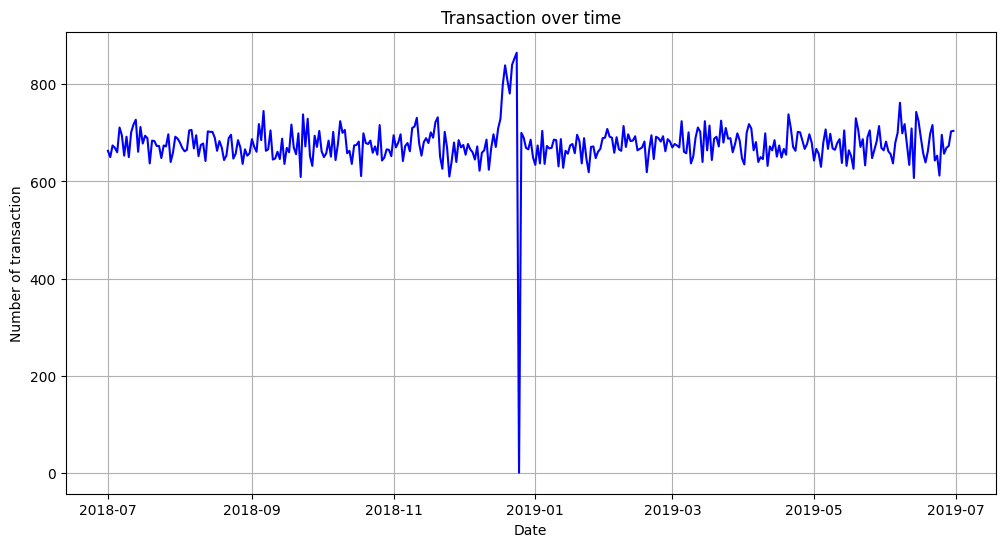

In [25]:
# Create a full date range
all_dates = pd.DataFrame({
    "DATE": pd.date_range(start=transaction_by_day["DATE"].min(), end=transaction_by_day["DATE"].max())
})

# Merge full date range to include missing days with 0 transaction
transaction_by_day = pd.merge(all_dates, transaction_by_day, on="DATE", how="left")
transaction_by_day["N"] = transaction_by_day["N"].fillna(0)

# Plot the number of transaction over time
plt.figure(figsize=(12, 6))
plt.plot(transaction_by_day["DATE"], transaction_by_day["N"], color="blue")
plt.title("Transaction over time")
plt.xlabel("Date")
plt.ylabel("Number of transaction")
plt.grid(True)
plt.show()

We see the transaction is between 800-600 which is good and in december we see that there an increase and end december it goes down. Lets zoom it further

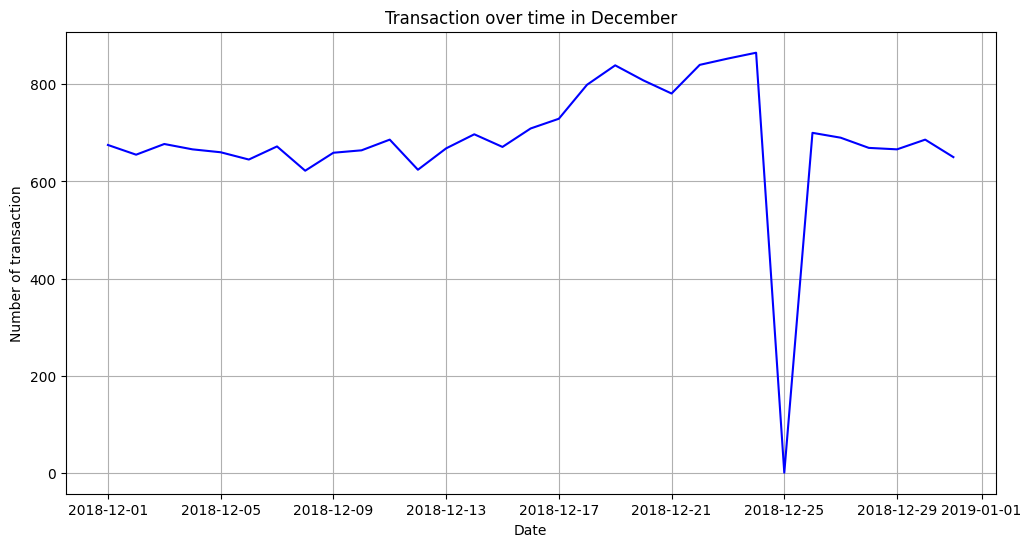

In [26]:
# Filter december data
december_data = transaction_by_day[transaction_by_day["DATE"].dt.month == 12]

# Fill missing days in December
all_december_dates = pd.DataFrame({
    "DATE" : pd.date_range(start=december_data["DATE"].min(), end=december_data["DATE"].max(), freq="D")
})
december_data = pd.merge(all_december_dates, december_data, on="DATE", how="left")
december_data["N"] = december_data["N"].fillna(0)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(december_data["DATE"], december_data["N"], color="blue")
plt.title("Transaction over time in December")
plt.xlabel("Date")
plt.ylabel("Number of transaction")
plt.grid(True)
plt.show()

Now we see that on 2018-12-05 there was no transaction cause it was Crhistmas Day hence the store was closed.

For further analysis we will create a features brand of chips and package size. We'll go for package size

In [27]:
# Create PACK SIZE colum
df_1["PACK_SIZE"] = df_1["PROD_NAME"].str.extract(r"(\d+)(\s*)([a-zA-Z]+)")[0].astype(float)

# Count the number of transaction for each PACK_SIZE and sort
pack_size_summary = df_1.groupby("PACK_SIZE").size().reset_index(name="count").sort_values("PACK_SIZE")
pack_size_summary

,PACK_SIZE,count
0,70.0,1507
1,90.0,3008
2,110.0,22387
3,125.0,1454
4,134.0,25102
5,135.0,3257
6,150.0,40203
7,160.0,2970
8,165.0,15297
9,170.0,19983


In [28]:
df_1["PACK_SIZE"].min()

70.0

In [29]:
df_1["PACK_SIZE"].max()

380.0

In [30]:
df_1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0


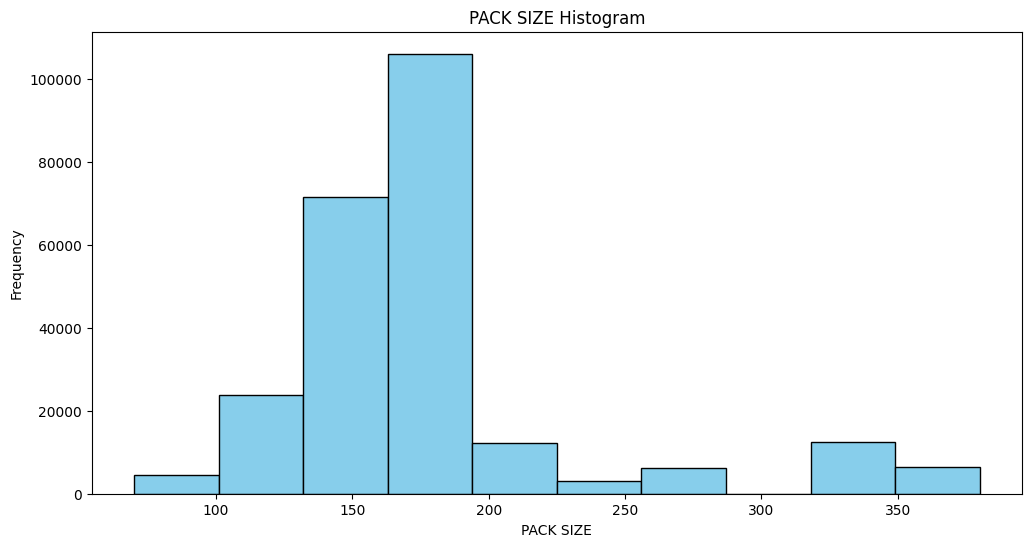

In [31]:
# Plot Histogram for PACK SIZE
plt.figure(figsize=(12, 6))
plt.hist(df_1["PACK_SIZE"], bins=10, edgecolor="black", color="skyblue")
plt.title("PACK SIZE Histogram")
plt.xlabel("PACK SIZE")
plt.ylabel("Frequency")
plt.show()

In [32]:
# Create Brand of chips column
df_1["BRAND"] = df_1["PROD_NAME"].str.extract(r"^(\w+)")[0].str.upper()

# Count numbers of brands from product name
brand_counts = df_1["BRAND"].value_counts().reset_index()
brand_counts.columns = ["BRAND", "COUNTS"]
brand_counts

,BRAND,COUNTS
0,KETTLE,41288
1,SMITHS,27390
2,PRINGLES,25102
3,DORITOS,22041
4,THINS,14075
5,RRD,11894
6,INFUZIONS,11057
7,WW,10320
8,COBS,9693
9,TOSTITOS,9471


In [33]:
# Ensure brand names are uppercased and cleaned
df_1["BRAND"] = df_1["PROD_NAME"].str.extract(r"^(\w+)", expand=False).str.upper().str.strip()

# define dictionary
brand_mapping = {
    "RRD": "RED",
    "SNBTS": "SUNBITES",
    "INFZNS": "INFUZIONS",
    "SMITH": "SMITHS",
    "NCC": "NATURAL",
    "DORITOS": "DORITO",
    "GRAIN": "GRNWVES"
}

df_1["BRAND"] = df_1["BRAND"].replace(brand_mapping)

In [34]:
df_1["BRAND"].value_counts()

,count
BRAND,
KETTLE,41288
SMITHS,30353
DORITO,25224
PRINGLES,25102
RED,16321
INFUZIONS,14201
THINS,14075
WW,10320
COBS,9693


## **Examining Customer Data**

We are satisfied with transaction data, now looking into customer's data

In [35]:
df_2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [36]:
df_2.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [37]:
df_2["LIFESTAGE"].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [38]:
df_2["PREMIUM_CUSTOMER"].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [39]:
# Count total number of Lifestage & Premium Customer
lifestage_count = df_2.groupby("LIFESTAGE").size().reset_index(name="count").sort_values(by="count")
lifestage_count

,LIFESTAGE,count
1,NEW FAMILIES,2549
0,MIDAGE SINGLES/COUPLES,7275
5,YOUNG FAMILIES,9178
2,OLDER FAMILIES,9780
6,YOUNG SINGLES/COUPLES,14441
3,OLDER SINGLES/COUPLES,14609
4,RETIREES,14805


In [40]:
premium_customer_count = df_2.groupby("PREMIUM_CUSTOMER").size().reset_index(name="count").sort_values(by="count")
premium_customer_count

,PREMIUM_CUSTOMER,count
2,Premium,18922
0,Budget,24470
1,Mainstream,29245


We see no issue in the given data. We'll merge it

In [41]:
Data = pd.merge(df_1, df_2, how="left")
Data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,KETTLE,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,TOSTITOS,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,DORITO,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,DORITO,YOUNG SINGLES/COUPLES,Premium


In [42]:
print(Data.isnull().sum())

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [43]:
print(Data["LIFESTAGE"].isnull().sum())

0


In [44]:
print(Data["PREMIUM_CUSTOMER"].isnull().sum())

0


We merged the data successfully we see no null values in any cloumns. Data exploration done

**Data Analysis on customer segments**

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [46]:
# Grouped the data and calculate the total sales
sales = Data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()

# Plot total_sales for lifestage & premium_customer
fig = px.treemap(
    sales,
    path=["PREMIUM_CUSTOMER", "LIFESTAGE"],
    values="TOT_SALES",
    title="Total Sales by Lifestage and Premium Customer"
)
fig.show()

From the above plot maximu sales are coming from :
* Mainstream :-    
  1. YOUNG SINGLES/COUPLES - 147,582.2
  2. OLDER SINGLES/COUPLES - 124,648.5
  3. RETIRESS - 145,168.75
  
* Budget :-
  1. OLDER FAMILIES - 156,863.75
  2. OLDER SINGLES/COUPLES - 127,833.6
  3. YOUNG FAMILIES - 129,717.95
  3. RETIRES - 105,916.3

* Premium :-
  1. OLDER SINGLES/COUPLES - 123,537.55
  2. RETIRES - 91,296.65


Proceed further to see if there is highest sales cause of total no of customer in each segments.

In [47]:
tot_count = Data.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).size().reset_index(name="count")
# Plot
fig = px.treemap(
    tot_count,
    path=["PREMIUM_CUSTOMER", "LIFESTAGE"],
    values="count",
    title="Propotion of customer in each segment"
)
fig.show()

Highest can also comes from quantity of chip purchased by customer

<ipython-input-57-90b4bf3359aa>:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



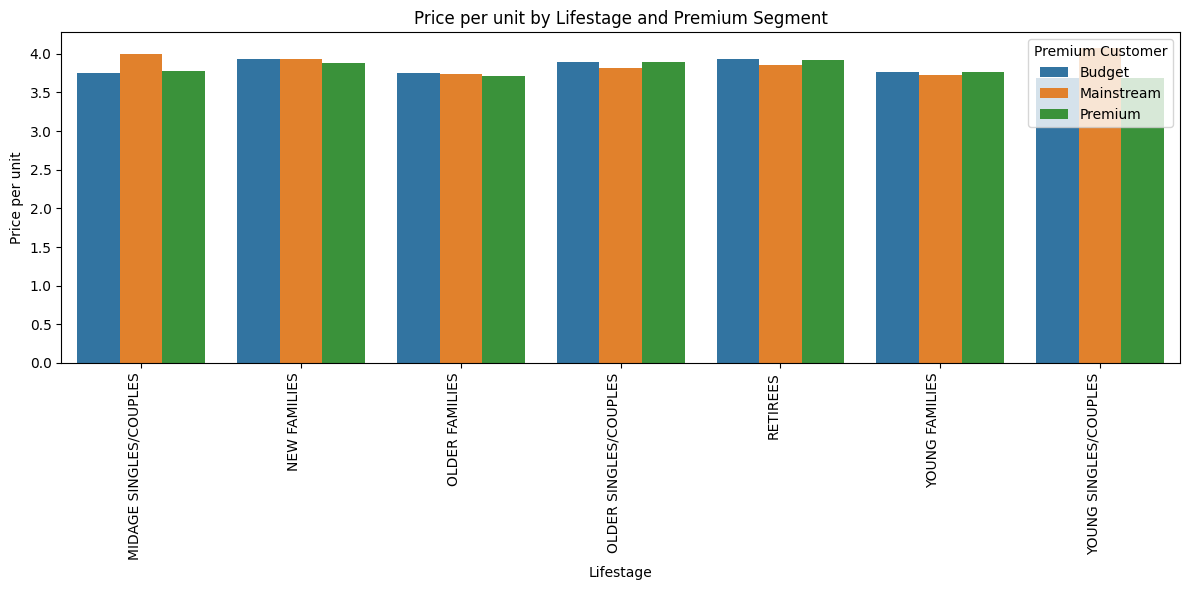

In [57]:
# Average price per unit
avg_unit = Data.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).apply(
    lambda x: x["TOT_SALES"].sum() / x["PROD_QTY"].sum()
).reset_index(name="AVG")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data = avg_unit,
    x = "LIFESTAGE",
    y = "AVG",
    hue = "PREMIUM_CUSTOMER",
    dodge = True
)


# Formatting
plt.xticks(rotation=90)
plt.title("Price per unit by Lifestage and Premium Segment")
plt.xlabel("Lifestage")
plt.ylabel("Price per unit")
plt.legend(title="Premium Customer")
plt.tight_layout()
plt.show()